# Introduction

In the ever-expanding realm of data-driven decision-making, machine learning algorithms have become invaluable tools. However, their efficacy is only as good as the data they are trained on. Today, we delve into a critical aspect of data science—dealing with imbalanced datasets through oversampling techniques.

[Image: Image of an Imbalanced Scale]

Class imbalance is not a rarity; it's a common occurrence in many real-world applications, from fraud detection and medical diagnoses to churn prediction and more. Understanding and addressing this class imbalance is essential to ensure our models are reliable and effective.

## The Imbalance Predicament

Class imbalance occurs when the distribution of classes in a dataset is skewed, with one class (the minority class) significantly outnumbered by another (the majority class). In this situation, machine learning models often struggle to learn the minority class patterns, leading to biased predictions and poor generalization.

Imbalance can skew the learning process, causing models to prioritize the majority class, which can have serious consequences. Biased models, for instance, can miss critical fraud cases or misdiagnose rare medical conditions.

Addressing this imbalance is where oversampling techniques come into play. In the next hour, we'll explore various oversampling strategies, understand their nuances, and learn how to apply them effectively to rectify class imbalance in your datasets.

Let's embark on this journey to master the art of oversampling and ensure our models perform with accuracy and fairness. 

> "Data imbalance is the silent killer of machine learning models, but oversampling holds the antidote." — [Your Name]

Now, let's begin with an overview of imbalanced datasets and their challenges.


# Section 1: Understanding Imbalanced Data (10 minutes)

## Definition of Imbalanced Data

Imbalanced data, in the context of machine learning, refers to datasets where the distribution of classes is highly skewed. It occurs when one class, typically the minority class, has significantly fewer instances than another class, known as the majority class. This imbalance is a common phenomenon in many real-world scenarios, leading to challenges in building accurate and fair machine learning models.

### Prevalence in Real-World Scenarios

Imbalanced datasets are not the exception but the norm in various domains:

- **Fraud Detection**: In financial services, fraudulent transactions are rare compared to legitimate ones.
- **Medical Diagnosis**: Rare diseases or conditions have fewer cases compared to common ailments.
- **Customer Churn Prediction**: Most customers continue using a service, while only a few cancel their subscriptions.

[Image: Image depicting an Imbalanced Dataset]

Understanding the prevalence of imbalanced data is crucial for developing effective machine learning models in these domains.

## Challenges Posed by Imbalanced Datasets

Imbalanced datasets introduce several challenges that can hinder the performance of machine learning models:

- **Biased Models**: Machine learning algorithms tend to prioritize the majority class, leading to biased predictions. Biased models can overlook minority class patterns, which is detrimental in scenarios like fraud detection or disease diagnosis.

- **Poor Generalization**: Imbalanced datasets can result in models that do not generalize well to unseen data. Models may perform excellently on the majority class but fail to generalize to the minority class.

- **Misleading Evaluation**: Traditional accuracy as an evaluation metric can be misleading with imbalanced datasets. A model that predicts the majority class all the time may achieve high accuracy, but it is practically useless in most applications.


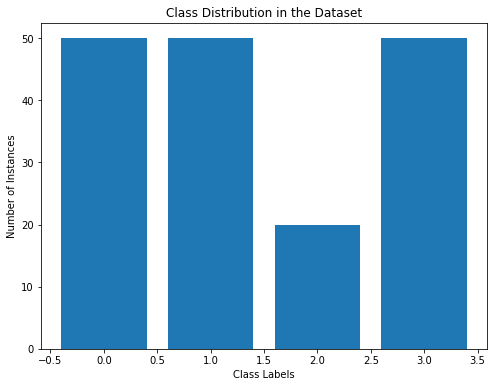

In [5]:
# Code Example: Class Distribution Visualization

import matplotlib.pyplot as plt
import torch
import numpy as np

y = None
c_num = [50, 50, 20, 50]

for i in range(len(c_num)):
    x = torch.full((c_num[i],), i, dtype=torch.int32)
    if y is None: y = x
    else: y = torch.cat((y, x), dim=0)

y = y[torch.randperm(y.size(0))]

unique, counts = np.unique(y.numpy(), return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique, counts)
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in the Dataset')
plt.show()


# Section 1.5: Tackling the Imbalance Challenge

Before we dive into the realm of oversampling, let's explore the diverse strategies available to address imbalanced datasets. The class imbalance predicament demands creative solutions, and here are a few that'll get you thinking:

## Resampling Techniques

**Oversampling**: This is our focal point, but don't forget about undersampling. It involves reducing the size of the majority class to match the minority class. Although effective, it can lead to information loss.

**Combination of Oversampling and Undersampling**: A blend of both worlds, where you oversample the minority class and undersample the majority class to strike a balance.

**Hybrid Methods**: Complex strategies involving combinations of oversampling, undersampling, and other data modification techniques to address the imbalance.

[Image: Strategies Image]

## Algorithmic Approaches

**Algorithm Selection**: Some machine learning algorithms are more resilient to class imbalance than others. Carefully choosing your algorithms can make a significant difference.

**Cost-Sensitive Learning**: Assigning different misclassification costs to classes to make the algorithm more sensitive to the minority class.

**Ensemble Methods**: Leveraging the power of ensemble techniques like Random Forest or Gradient Boosting to handle imbalance.

## Synthetic Data Generation

**SMOTE Variants**: Beyond traditional SMOTE, consider its variants like Borderline-SMOTE and ADASYN, which adapt to the dataset's needs.

**GANs (Generative Adversarial Networks)**: Cutting-edge techniques that use GANs to generate synthetic data, enhancing the minority class.

## Anomaly Detection

**Anomaly Detection Models**: Apply anomaly detection methods to identify rare instances, which can be part of the minority class.

## Transfer Learning

**Transfer Learning**: Utilize pre-trained models or knowledge from one domain to improve classification in another, potentially addressing imbalance.

With these strategies in your arsenal, you're better equipped to handle imbalanced datasets. Now, let's shift our focus to the exciting world of oversampling techniques in Section 3.

# Section 2: Oversampling Techniques Overview (10 minutes)

## The Art of Oversampling

In our quest to tackle imbalanced datasets, we encounter a powerful technique: oversampling. It's like adding more instruments to balance a seesaw—strategically augmenting the minority class to harmonize the dataset. Let's delve into the concept and various techniques of oversampling.

[Image: Balancing Scales Image]

## Exploring Oversampling

Oversampling is a data resampling technique used to address class imbalance. It involves generating synthetic instances of the minority class, effectively increasing its representation in the dataset. By doing so, we empower our machine learning models to recognize and learn from the minority class, leading to more accurate and fair predictions.

Now, let's meet the stars of the oversampling show:

## 1. Random Oversampling

**The Fundamentals**: Random Oversampling is the simplest approach. It duplicates random instances of the minority class until balance is achieved.

**Code in Action**:
```python
import imbalanced-learn as imb
oversampler = imb.over_sampling.RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)


## Synthetic Minority Over-sampling Technique (SMOTE)
The Game-Changer: SMOTE creates synthetic instances by interpolating between existing minority class samples, striking a balance between preserving the data's original structure and adding diversity.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## 3. Adaptive Synthetic Sampling (ADASYN)
The Adaptive Ally: ADASYN fine-tunes SMOTE. It generates more synthetic samples for those minority instances that are harder to learn, ensuring an optimal balance.

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

## Borderline-SMOTE
The Margin Explorer: Borderline-SMOTE identifies and oversamples instances near the class boundary, reinforcing the dataset's representation of challenging cases.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42, kind='borderline-1')
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

## SMOTE-NC (SMOTE for Nominal and Continuous Features)
The Fusion Master: SMOTE-NC extends SMOTE's capabilities to datasets with a mix of categorical and continuous features, a common scenario in real-world applications.

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(sampling_strategy='auto', random_state=42, categorical_features=[0, 2, 5])
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

By understanding and wisely employing these oversampling techniques, you gain the power to transform imbalanced datasets into balanced battlegrounds, where your machine learning models can thrive. Let's now venture deeper into these techniques to grasp their nuances. 
This section provides a comprehensive yet approachable introduction to oversampling techniques and includes code snippets for practical implementation. 

This section provides a comprehensive yet approachable introduction to oversampling techniques and includes code snippets for practical implementation.

# Section 3: Random Oversampling (7 minutes)

## The Simplicity of Random Oversampling

Random Oversampling is a straightforward technique to address class imbalance. It aims to balance the dataset by creating duplicates of random instances from the minority class.

[Image: Random Oversampling Image]

### Advantages and Limitations

**Advantages**:
- **Ease of Use**: Random Oversampling is simple to implement and a quick fix for imbalance.
- **No Complexity Added**: It does not introduce additional complexity to the model.

**Limitations**:
- **Risk of Overfitting**: Duplicating samples can lead to overfitting, where the model becomes too tailored to the training data.
- **Loss of Information**: It might not provide a diverse representation of the minority class, leading to limited model generalization.


In [ ]:
### Code Example: Random Oversampling

from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply Random Oversampling to your dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

Section 4: Synthetic Minority Over-sampling Technique (SMOTE) (7 minutes)
Unleashing SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a groundbreaking approach in combating class imbalance. It goes beyond simple duplication and crafts synthetic instances to balance the dataset.

[Image: SMOTE Image]

SMOTE Algorithm
The SMOTE algorithm works by creating synthetic samples based on the feature space similarity between existing instances of the minority class. It bridges the gap between the existing samples, fostering diversity.

Effective Scenarios:

Sparse Data: SMOTE is effective when data is sparse, making traditional oversampling less suitable.
Challenging Classification Problems: It is ideal for complex classification tasks where the minority class is hard to distinguish.

In [ ]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


Section 5: Advanced Oversampling Techniques (10 minutes)
Elevating Oversampling: Advanced Techniques
While Random Oversampling and SMOTE are potent, advanced oversampling techniques like ADASYN, Borderline-SMOTE, KMeans Smote, SVM Smote, and SMOTE-NC cater to specific dataset characteristics and challenges.

[Image: Advanced Oversampling Image]

Selecting the Right Technique
When to Use Each Technique:

ADASYN: Opt for ADASYN when you need fine-grained control over which minority instances to oversample. It adapts to the data distribution, focusing on the harder-to-learn examples.

Borderline-SMOTE: Use Borderline-SMOTE when you want to reinforce instances near the class boundary, improving the model's ability to classify challenging samples.

KMeans Smote: KMeans Smote combines clustering with SMOTE to create synthetic samples with more representative centroids.

SVM Smote: SVM Smote leverages support vector machines to identify and oversample the minority class, emphasizing support vectors.

SMOTE-NC: Employ SMOTE-NC when your dataset has a mix of categorical and continuous features. It extends SMOTE's capabilities to handle this hybrid data.

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42, kind='borderline-1')
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)


In [ ]:
from imblearn.over_sampling import SVMSMOTE

svm_smote = SVMSMOTE(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = svm_smote.fit_resample(X, y)


In [ ]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(sampling_strategy='auto', random_state=42, categorical_features=[0, 2, 5])
X_resampled, y_resampled = smote_nc.fit_resample(X, y)


# Section 6: Evaluation Metrics for Imbalanced Data (5 minutes)

## Measuring Success in Imbalanced Datasets

When dealing with imbalanced datasets, standard evaluation metrics like accuracy may not tell the whole story. We need metrics that account for the distribution of classes. Let's explore key evaluation metrics and how to interpret them:

### Precision, Recall, F1-score

**Precision** measures the accuracy of positive predictions. It answers, "Of the instances predicted as positive, how many are truly positive?" Higher precision indicates fewer false positives.

**Recall** (Sensitivity) measures the ability to capture all positive instances. It answers, "Of all the true positive instances, how many did we correctly predict?" Higher recall means fewer false negatives.

**F1-score** is the harmonic mean of precision and recall. It balances precision and recall, providing a single metric that considers both false positives and false negatives.

### ROC-AUC

The **Receiver Operating Characteristic (ROC) curve** and the **Area Under the Curve (AUC)** measure the model's ability to distinguish between classes. A high AUC indicates better class separation.

### Confusion Matrix

The confusion matrix is a tabular representation of the model's performance, showing true positives, true negatives, false positives, and false negatives.

### Interpretation

- High precision is crucial when minimizing false positives is essential.
- High recall is vital when capturing all positive instances is critical.
- The F1-score is a balanced measure that's valuable when precision and recall need to be in harmony.
- A higher ROC-AUC indicates better class separation and discrimination.
- Analyze the confusion matrix for insights into true and false predictions.


# Section 7: Model Building and Fine-Tuning (6 minutes)

## Crafting Effective Models

Building a machine learning model with oversampled data is a step-by-step process:

1. **Data Preprocessing**: Prepare the data, which includes standardization, normalization, and feature engineering.

2. **Oversampling**: Apply the chosen oversampling technique, such as Random Oversampling or SMOTE, to balance the dataset.

3. **Splitting Data**: Divide the data into training, validation, and test sets to evaluate the model's performance.

4. **Model Selection**: Choose an appropriate algorithm or model. Common choices include decision trees, random forests, logistic regression, and deep learning models.

5. **Model Training**: Train the selected model on the oversampled training data.

6. **Hyperparameter Tuning**: Fine-tune model hyperparameters using techniques like grid search or random search to optimize performance.

7. **Evaluation**: Assess the model's performance using evaluation metrics, including precision, recall, F1-score, ROC-AUC, and the confusion matrix.

8. **Model Deployment**: If the model meets the desired criteria, deploy it for predictions.

### Importance of Hyperparameter Tuning

Hyperparameter tuning is essential for achieving the best model performance. It involves adjusting hyperparameters like learning rates, the number of layers in a neural network, or the maximum depth of a decision tree to optimize the model's predictive ability.

### Code Example: Model Building and Hyperparameter Tuning

Here's a simplified example using scikit-learn for building a Random Forest classifier with oversampled data and performing hyperparameter tuning:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize a Random Forest classifier
model = RandomForestClassifier()

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_resampled, y_train_resampled)


# Section 8: Case Studies and Real-World Applications (5 minutes)

## Real-World Success with Oversampling

Let's delve into real-world applications where oversampling techniques have played a pivotal role in addressing class imbalance. These case studies exemplify the significance of overcoming imbalance challenges:

### Healthcare: Disease Prediction

In the medical field, predicting rare diseases is a monumental task. Oversampling techniques have been instrumental in creating balanced datasets for training predictive models. For example, in the detection of rare genetic disorders, oversampling enables accurate diagnoses and potentially life-saving interventions.

### Credit Risk Assessment

Balancing the scales in credit risk assessment is critical. Oversampling helps credit scoring models to make fair assessments of loan applications, reducing the risk of approving loans to individuals with bad credit histories.

### Fraud Detection

Detecting fraudulent transactions in financial systems is a classic example of a highly imbalanced problem. Oversampling ensures that models can recognize the rare occurrences of fraud, safeguarding financial institutions and their customers.

### Natural Language Processing

In text classification tasks, certain categories may be underrepresented. Oversampling mitigates this issue by creating additional training data for minority classes, improving sentiment analysis, and spam detection systems.

### Manufacturing Quality Control

In manufacturing, ensuring product quality and identifying defects is vital. Oversampling techniques assist in training models to detect rare defects by creating a balanced dataset, resulting in more accurate quality control.

These real-world applications showcase the role of oversampling in addressing imbalanced data and its significant impact on industries.

## Challenges and Success Stories

While oversampling has been transformative, it's not without challenges. Class imbalance remains an ongoing issue, and oversampling is a valuable tool in the toolbox. It's crucial to balance success stories with challenges, highlighting the need for ongoing research and innovation.

# Section 9: Common Pitfalls and Best Practices (5 minutes)

## Navigating Oversampling Challenges

Oversampling is a powerful approach, but its effectiveness depends on proper implementation. Let's explore common pitfalls and best practices for working with oversampled data:

### Common Pitfalls

**Overfitting**: Oversampling can lead to overfitting if not handled carefully. It's crucial to split data into training, validation, and test sets to assess model generalization.

**Data Leakage**: Ensure that oversampling is performed only on the training data, avoiding any contamination of the validation or test sets.

**Incorrect Evaluation Metrics**: Using standard metrics like accuracy on oversampled data can be misleading. Focus on metrics like precision, recall, F1-score, and ROC-AUC.

**Excessive Computation**: Oversampling can significantly increase the size of the dataset, leading to longer training times. Optimize computational resources for efficiency.

### Best Practices

**Cross-Validation**: Implement k-fold cross-validation to robustly evaluate model performance on imbalanced data.

**Hyperparameter Tuning**: Pay close attention to hyperparameter tuning, especially when working with oversampled data, to achieve the best results.

**Resampling Methods**: Experiment with various oversampling techniques and choose the one that best suits your data distribution.

**Ensemble Methods**: Combine multiple models using ensemble techniques, such as bagging or boosting, to enhance predictive power.

By avoiding common pitfalls and implementing best practices, you can harness the full potential of oversampling techniques, making your machine learning solutions more effective and robust.


# Section 10: Understanding Embedding Space, Interpolation, and SMOTE Limitations

## Navigating the Embedding Space Landscape

In the realm of oversampling techniques, the nature of the embedding space plays a significant role in the effectiveness of methods like SMOTE. Embedding space refers to the space in which data points are represented or interpolated. This section explores the relationship between embedding space, interpolation, and the limitations of SMOTE, considering both spherical and non-spherical embedding spaces.

### Spherical vs. Non-Spherical Embedding Space

#### Spherical Embedding Space

In a spherical embedding space, data points are distributed in a manner where each point is equidistant from a central point (e.g., origin). SMOTE, designed for spherical spaces, assumes that synthetic data points can be interpolated linearly between nearest neighbors.

#### Non-Spherical Embedding Space

Non-spherical embedding spaces are more complex, where data points do not exhibit equal distance characteristics. In such spaces, SMOTE's simplistic interpolation approach can have limitations.

### Limitations of SMOTE

**1. Imbalanced Class Clusters**: In non-spherical embedding spaces, SMOTE may not effectively capture the distribution of minority class clusters, leading to less representative synthetic samples.

**2. Reduced Variability**: SMOTE can generate synthetic samples that are too close to the original minority instances, potentially reducing the variability of the data.

**3. Impact on Decision Boundaries**: In non-spherical spaces, SMOTE's synthetic samples may affect the positioning of decision boundaries in a way that could be detrimental to the model's performance.

### Examples and Code Snippets

#### Case Study 1: Spherical Embedding Space

In a spherical embedding space, SMOTE works effectively, as data points exhibit uniform distribution. Here's a code snippet showcasing SMOTE applied to a spherical embedding space using Python's `imbalanced-learn` library:

```python
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, weights=[0.99, 0.01], random_state=42)

# Apply SMOTE in a spherical embedding space
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
